In [29]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import math


In [30]:
# describe the model
def deriv(y, t, N, gamma, alpha, delta):
    S, E, I, R, B, H = y
    dSdt = -B * S * I / N + alpha * R
    dEdt = B * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I - alpha * R
    dBdt = B * (-1 / 0.7 * math.sin(2 * math.pi / 700)) # adding a new time varying transmission rate  
    dHdt = 0   # healthcare's COVID-19 capacity
    return dSdt, dEdt, dIdt, dRdt, dBdt, dHdt

In [31]:
# describe the parameters
N = 10336399        # population of Sweden (January 2020 source: www.scb.se)
delta = 1.0 / 5.0   # incubation period of five days 
D = 7.0             # number of days that an infected person has and can spread the disease
gamma = 1.0 / D     # removal rate 
alpha = 1 / 180     # immunity lost after six months 

S0, E0, I0, R0, B0, H0 = N-1, 1, 0, 0, 1, 24807   # initial conditions: one infected, rest susceptible

In [32]:
t = np.linspace(0, 365, 366) # Grid of time points (in days)
y0 = S0, E0, I0, R0, B0, H0 # Initial conditions vector

# Integrate the SEIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, gamma, alpha, delta))
S, E, I, R, B, H = ret.T

In [33]:
def plotseir(t, S, E, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')  
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered') 

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig("Plot_SEIR.png")
  plt.show();

plot the graph

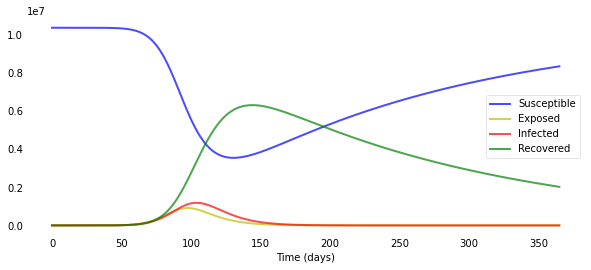

In [34]:
plotseir(t, S, E, I, R)

In [35]:
def plothealthcare(t, H, I):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, H, 'o', alpha=0.7, linewidth=2, label='Healthcare capacity') 

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig("Plot_healthcare.png")
  plt.show();

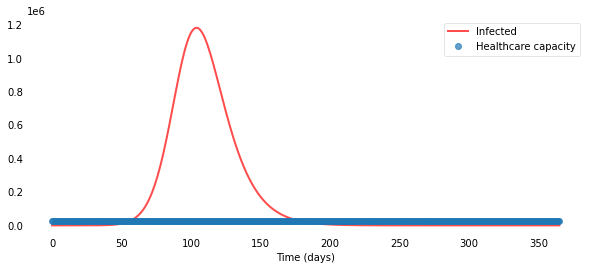

In [36]:
plothealthcare(t, H, I)

In [37]:
def plottransmission(t, B):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, B, 'b', alpha=0.7, linewidth=2, label='Transmission')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig("Plot_transmission.png")
  plt.show();

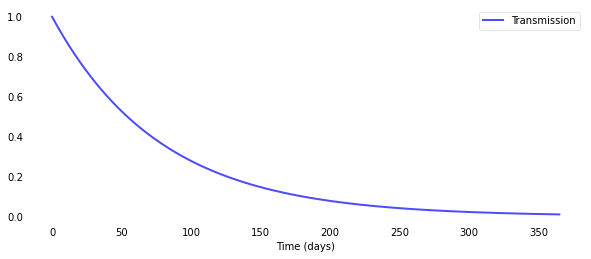

In [38]:
plottransmission(t, B)